In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = keras.datasets.fashion_mnist.load_data()

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = data

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

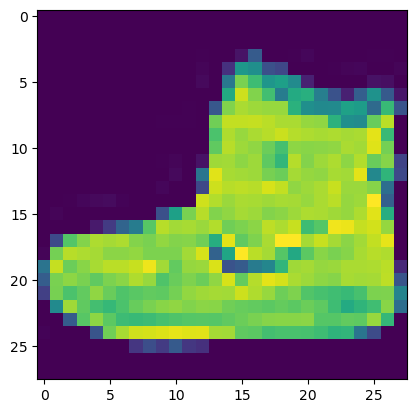

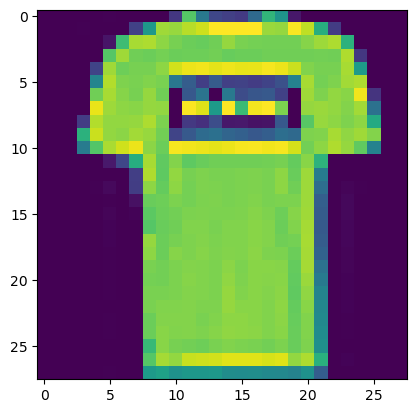

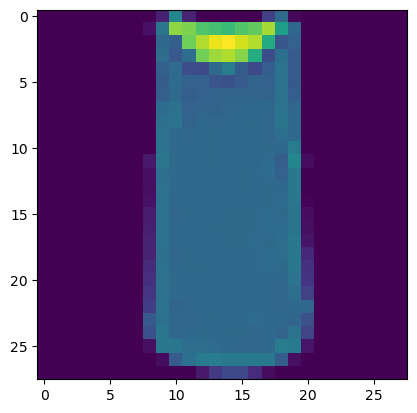

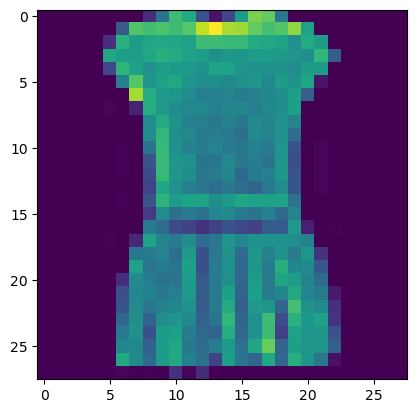

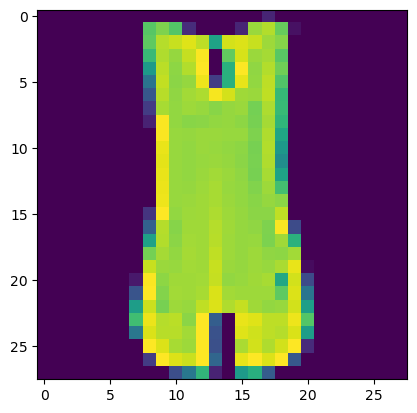

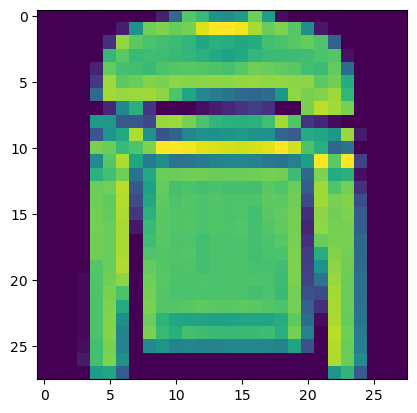

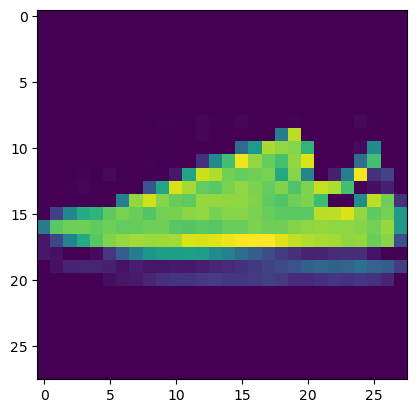

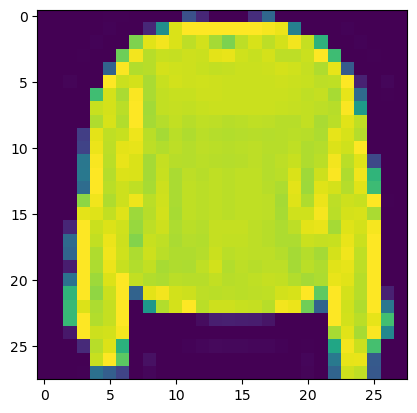

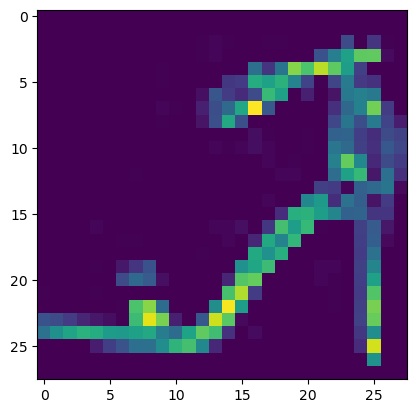

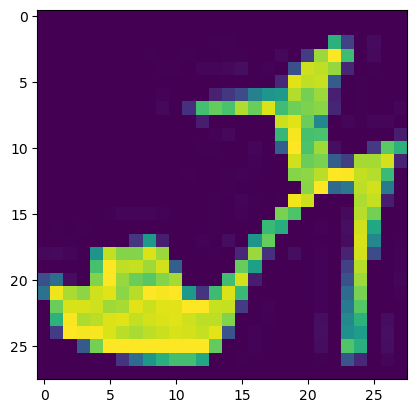

In [6]:
for i in range(10):
    plt.imshow(X_train[i])
    plt.show()

In [7]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
X_train.shape

(55000, 28, 28)

In [19]:
keras.backend.clear_session()

In [20]:
tf.random.set_seed(42)

model = Sequential([
    Input(shape=X_train.shape[1:]),
    Flatten(),
    Dense(300, activation="relu"),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_split=.2)

Epoch 1/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4523 - val_loss: 0.4595
Epoch 2/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4478 - val_loss: 0.4561
Epoch 3/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4436 - val_loss: 0.4528
Epoch 4/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4397 - val_loss: 0.4497
Epoch 5/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4359 - val_loss: 0.4468
Epoch 6/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4324 - val_loss: 0.4440
Epoch 7/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4290 - val_loss: 0.4413
Epoch 8/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4259 - val_loss: 0.4388
Epoch 9/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4228 - val_loss: 0.4363
Epoch 10/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4198 - val_loss: 0.4340
Epoch 11/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4170 - val_loss: 0.4317
Epoch 12/30
1375/1375 ━━━━━━━━

[]

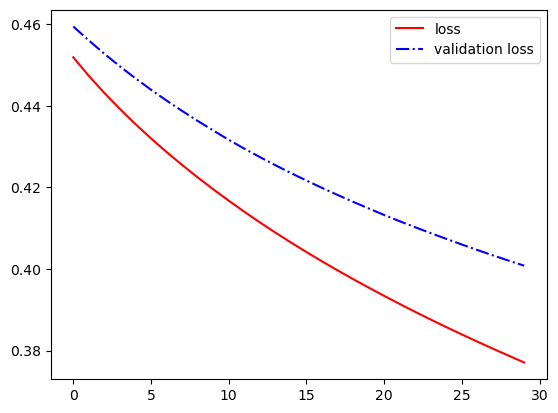

In [30]:
plt.plot(history.history["loss"], 'r-', label="loss")
plt.plot(history.history['val_loss'], 'b-.', label="validation loss")
plt.legend()
plt.plot()